<a href="https://colab.research.google.com/github/vivekvardhan30/NNFL-Project/blob/main/Final_NNFL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv("heart_disease_risk_dataset_earlymed.csv")

In [3]:
#partial view of dataset from top
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [4]:
#partial view of dataset from bottom
df.tail()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,56.0,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0
69999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,51.0,1.0


In [5]:
#basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           70000 non-null  float64
 1   Shortness_of_Breath  70000 non-null  float64
 2   Fatigue              70000 non-null  float64
 3   Palpitations         70000 non-null  float64
 4   Dizziness            70000 non-null  float64
 5   Swelling             70000 non-null  float64
 6   Pain_Arms_Jaw_Back   70000 non-null  float64
 7   Cold_Sweats_Nausea   70000 non-null  float64
 8   High_BP              70000 non-null  float64
 9   High_Cholesterol     70000 non-null  float64
 10  Diabetes             70000 non-null  float64
 11  Smoking              70000 non-null  float64
 12  Obesity              70000 non-null  float64
 13  Sedentary_Lifestyle  70000 non-null  float64
 14  Family_History       70000 non-null  float64
 15  Chronic_Stress       70000 non-null 

In [6]:
#dimention of the dataset
df.shape

(70000, 19)

In [7]:
#basic statistics symmary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chest_Pain,70000.0,0.499229,0.500003,0.0,0.0,0.0,1.0,1.0
Shortness_of_Breath,70000.0,0.500586,0.500003,0.0,0.0,1.0,1.0,1.0
Fatigue,70000.0,0.498571,0.500002,0.0,0.0,0.0,1.0,1.0
Palpitations,70000.0,0.498729,0.500002,0.0,0.0,0.0,1.0,1.0
Dizziness,70000.0,0.501414,0.500002,0.0,0.0,1.0,1.0,1.0
Swelling,70000.0,0.498929,0.500002,0.0,0.0,0.0,1.0,1.0
Pain_Arms_Jaw_Back,70000.0,0.501500,0.500001,0.0,0.0,1.0,1.0,1.0
Cold_Sweats_Nausea,70000.0,0.502457,0.499998,0.0,0.0,1.0,1.0,1.0
High_BP,70000.0,0.497429,0.499997,0.0,0.0,0.0,1.0,1.0
High_Cholesterol,70000.0,0.499214,0.500003,0.0,0.0,0.0,1.0,1.0


                     Chest_Pain  Shortness_of_Breath   Fatigue  Palpitations  \
Chest_Pain             1.000000             0.358374  0.357769      0.355855   
Shortness_of_Breath    0.358374             1.000000  0.357634      0.357490   
Fatigue                0.357769             0.357634  1.000000      0.357452   
Palpitations           0.355855             0.357490  0.357452      1.000000   
Dizziness              0.355235             0.363827  0.355925      0.361324   
Swelling               0.354598             0.355146  0.362082      0.356682   
Pain_Arms_Jaw_Back     0.361464             0.355827  0.365526      0.358753   
Cold_Sweats_Nausea     0.363212             0.356313  0.357106      0.358504   
High_BP                0.244110             0.242838  0.241475      0.245391   
High_Cholesterol       0.238770             0.242859  0.240997      0.239769   
Diabetes               0.236488             0.236285  0.237633      0.237261   
Smoking                0.237842         

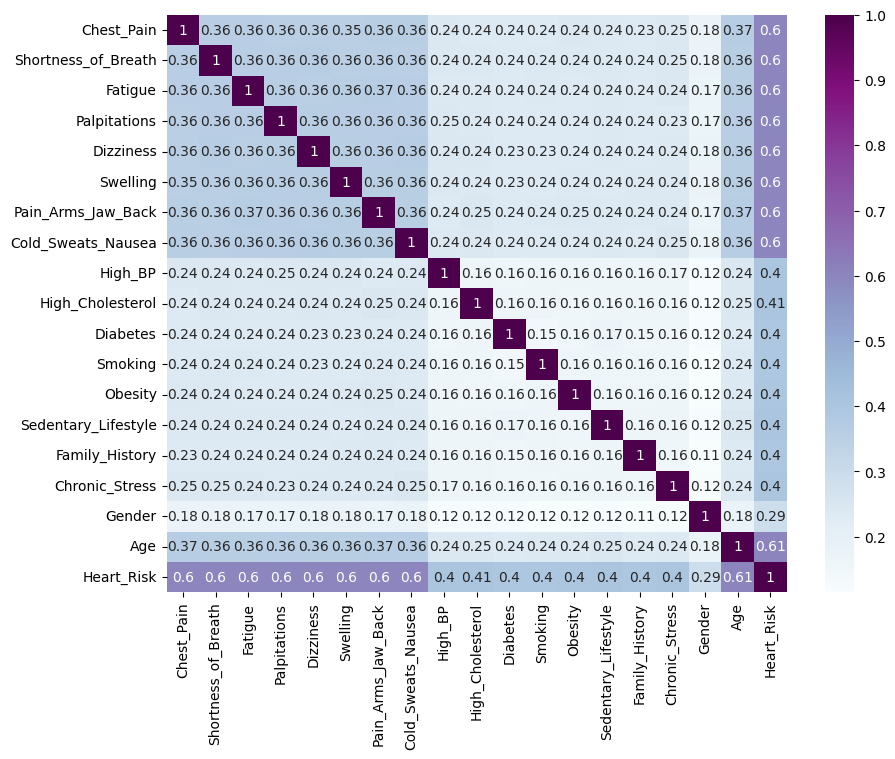

In [8]:
#finding correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
corr_var=df.corr(numeric_only=True) # added numeric_only=True
print(corr_var)
plt.figure(figsize=(10,7.5)) #matplotlib.pyplot is now imported as plt
sns.heatmap(corr_var, annot=True, cmap='BuPu') #seaborn is now imported as sns
plt.show()

In [9]:
# Final Optimized Cheetah Optimizer Code for High Accuracy & Low Loss
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess dataset
X = df.drop("Heart_Risk", axis=1).values
y = df["Heart_Risk"].astype(int).values.reshape(-1, 1)

# Normalize inputs
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Keras model (more layers)
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Initialize model once and reuse it
model = create_model()
initial_weights = np.concatenate([w.flatten() for w in model.get_weights()])
model_structure = [w.shape for w in model.get_weights()]

def reshape_weights(model, flat_weights):
    new_weights = []
    idx = 0
    for shape in model_structure:
        size = np.prod(shape)
        new_weights.append(flat_weights[idx:idx + size].reshape(shape))
        idx += size
    model.set_weights(new_weights)

# Vectorized fitness function
@tf.function
def predict_fast(x):
    return model(x, training=False)

def fitness_function(weights):
    reshape_weights(model, weights)
    y_pred = predict_fast(tf.convert_to_tensor(X_train, dtype=tf.float32)).numpy()
    loss = -np.mean(y_train * np.log(y_pred + 1e-8) + (1 - y_train) * np.log(1 - y_pred + 1e-8))
    return loss

# Cheetah Optimizer
class CheetahOptimizer:
    def __init__(self, obj_func, lb, ub, dim, pop_size=10, m=2, max_iters=1500):
        self.obj_func = obj_func
        self.lb = np.array([lb] * dim)
        self.ub = np.array([ub] * dim)
        self.dim = dim
        self.n = pop_size
        self.m = m
        self.max_iters = max_iters

    def optimize(self):
        pop = [{"Position": np.random.uniform(self.lb, self.ub), "Cost": float("inf")} for _ in range(self.n)]
        for individual in pop:
            individual["Cost"] = self.obj_func(individual["Position"])
        best_sol = min(pop, key=lambda x: x["Cost"])
        x_best = best_sol.copy()
        t = 0
        T = int(np.ceil(self.dim / 10) * 60)
        FEs = self.n

        while FEs <= self.max_iters:
            i0 = np.random.choice(self.n, self.m, replace=False)
            for k in range(self.m):
                i = i0[k]
                a = i0[k - 1] if k == self.m - 1 else i0[k + 1]
                X = pop[i]["Position"]
                X1 = pop[a]["Position"]
                Xb = best_sol["Position"]
                Xbest = x_best["Position"]
                kk = 0.25
                Z = np.copy(X)
                r_hat = np.random.randn(self.dim)
                r1 = np.random.rand(self.dim)
                alpha = (0.0001 * t / T) * (self.ub - self.lb) if k == 0 else (0.0001 * t / T) * np.abs(Xb - X) + 0.001 * (np.random.rand(self.dim) > 0.9)
                r = np.random.randn(self.dim)
                r_check = np.abs(r) ** np.exp(r / 2) * np.sin(2 * np.pi * r)
                beta = X1 - X
                h0 = np.exp(2 - 2 * t / T)
                H = np.abs(2 * r1 * h0 - h0)
                r2, r3, r4 = np.random.rand(self.dim), kk + np.random.rand(self.dim), 3 * np.random.rand(self.dim)
                Z[H > r4] = X[H > r4] + 1.0 / r_hat[H > r4] * alpha[H > r4]
                Z[H <= r4] = Xbest[H <= r4] + r_check[H <= r4] * beta[H <= r4]
                Z[r2 > r3] = X[r2 > r3]
                Z = np.clip(Z, self.lb, self.ub)
                cost = self.obj_func(Z)
                FEs += 1
                if cost < pop[i]["Cost"]:
                    pop[i] = {"Position": Z, "Cost": cost}
                    if cost < best_sol["Cost"]:
                        best_sol = pop[i].copy()
            t += 1
            if best_sol["Cost"] < x_best["Cost"]:
                x_best = best_sol.copy()
        return x_best

# === Train using Cheetah Optimizer ===
accuracy_log = []
loss_log = []
dim = len(initial_weights)
lb, ub = -0.5, 0.5
epochs = 30
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    co = CheetahOptimizer(obj_func=fitness_function, lb=lb, ub=ub, dim=dim, pop_size=10, m=2, max_iters=1500)
    best_solution = co.optimize()
    reshape_weights(model, best_solution['Position'])
    y_pred = model.predict(X_test, verbose=0)
    loss = -np.mean(y_test * np.log(y_pred + 1e-8) + (1 - y_test) * np.log(1 - y_pred + 1e-8))
    acc = np.mean((y_pred > 0.5) == y_test)
    accuracy_log.append(acc)
    loss_log.append(loss)
    print(f" accuracy: {acc:.4f} - loss: {loss:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
 accuracy: 0.9778 - loss: 0.0609
Epoch 2/30
 accuracy: 0.9757 - loss: 0.0690
Epoch 3/30
 accuracy: 0.9715 - loss: 0.0777
Epoch 4/30
 accuracy: 0.9647 - loss: 0.1053
Epoch 5/30
 accuracy: 0.9710 - loss: 0.0784
Epoch 6/30
 accuracy: 0.9748 - loss: 0.0674
Epoch 7/30
 accuracy: 0.9722 - loss: 0.0768
Epoch 8/30
 accuracy: 0.9768 - loss: 0.0629
Epoch 9/30
 accuracy: 0.9813 - loss: 0.0566
Epoch 10/30
 accuracy: 0.9666 - loss: 0.0932
Epoch 11/30
 accuracy: 0.9604 - loss: 0.1095
Epoch 12/30
 accuracy: 0.9600 - loss: 0.1176
Epoch 13/30
 accuracy: 0.9694 - loss: 0.0844
Epoch 14/30
 accuracy: 0.9499 - loss: 0.1417
Epoch 15/30
 accuracy: 0.9803 - loss: 0.0606
Epoch 16/30
 accuracy: 0.9687 - loss: 0.0814
Epoch 17/30
 accuracy: 0.9780 - loss: 0.0595
Epoch 18/30
 accuracy: 0.9635 - loss: 0.1013
Epoch 19/30
 accuracy: 0.9775 - loss: 0.0628
Epoch 20/30
 accuracy: 0.9771 - loss: 0.0692
Epoch 21/30
 accuracy: 0.9655 - loss: 0.0904
Epoch 22/30
 accuracy: 0.9729 - loss: 0.0761
Epoch 23/30
 accura

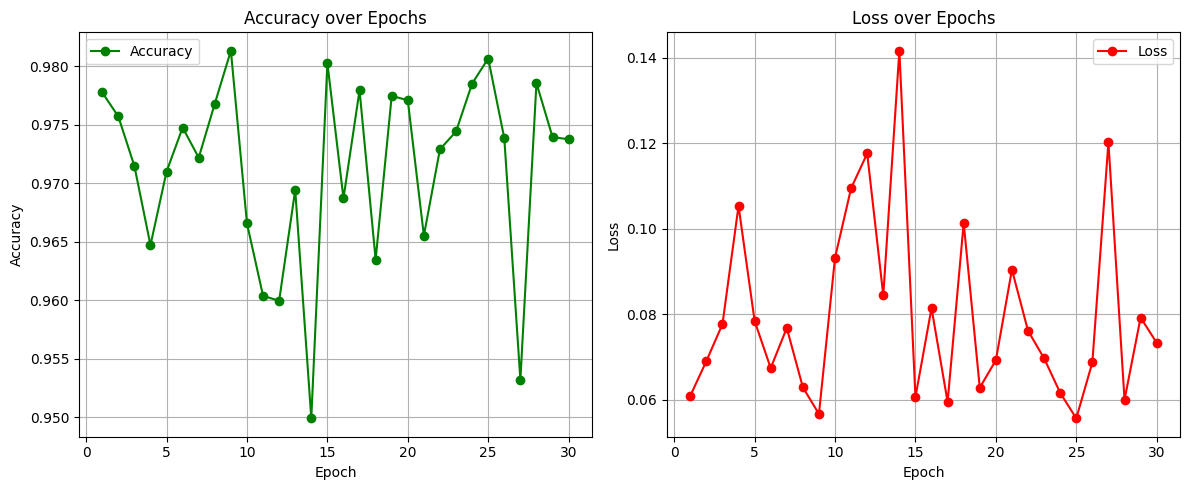

In [10]:
import matplotlib.pyplot as plt

epochs_range = list(range(1, len(accuracy_log) + 1))

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy_log, marker='o', color='green', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_log, marker='o', color='red', label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Confusion Matrix and Final Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_final = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_final)
final_acc = accuracy_score(y_test, y_pred_final)
print("Confusion Matrix:", cm)
print("Final Test Accuracy:", final_acc)

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix: [[10238   277]
 [  274 10211]]
Final Test Accuracy: 0.9737619047619047


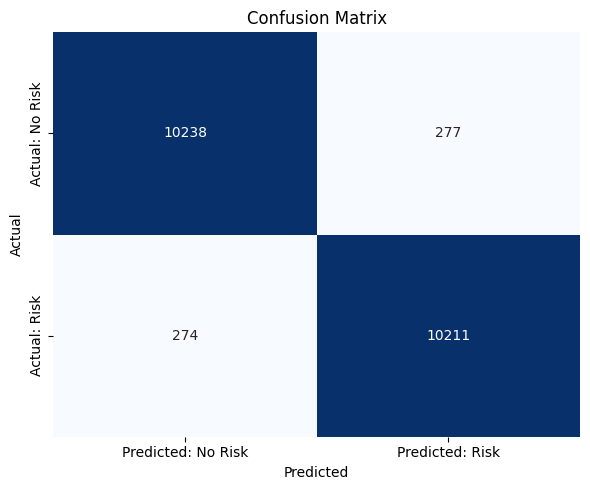

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted: No Risk", "Predicted: Risk"],
            yticklabels=["Actual: No Risk", "Actual: Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()